In [8]:
from IPython.display import Image, Audio, display
from time import sleep
import os
import types
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
from pydub import AudioSegment
import threading

In [9]:
def play(freq, s, A = 1):
    framerate =  44100
    t = np.linspace(0, s, framerate*s)
    d = A * np.cos(2*np.pi*freq*t)
    return d

In [10]:
def chord(notas, s, arp = False):
    framerate = 44100
    t = np.linspace(0, s, framerate*s)
    A = 1
    fase = 0
    y = t.copy()        
    f = lambda t: A * np.cos(omega*t + fase)
    for nota in notas:
        omega = 2*np.pi*nota
        y += f(t)
    return y

In [11]:
def progression(chords, n_times):
    for i in range(3):
        am = threading.Thread(target = chord, args = (Am7, 4))
        e = threading.Thread(target = chord, args = (E7b9, 4))
        am.start()
        am.join()
        e.start()
        e.join()

In [12]:
def random_mel(notas, n, compas = 4,):
    melo = np.array([])
    for c in range(n):
        l = []
        while sum(l) < compas:
            l_ = np.random.choice([1/8, 1/4, 1/2, 1])
            if sum(l) + l_ <= compas:
                l.append(l_)
        for n in l:
            if np.random.choice([True, True, True, True, False]):
                melo = np.append(melo, play(nota[np.random.choice(notas)], n))
            else:
                melo = np.append(melo, play(0, n))
    return melo

In [13]:
def bateria(n, A=5, compas = 4):
    framerate =  44100
    l = []
    t = 0.01
    A = 5
    tot = np.array([])
    for n in range(n):
        c = []
        while sum(c) < compas:
            freq = np.random.choice([80, 400])
            l_ = np.random.choice([1/8, 1/8, 1/4, 1/4, 1/2])
            c.append(l_)
            l.append(l_)
            sil = np.linspace(sum(l) + t, sum(l) + l_, framerate*l_)
            pum = np.linspace(sum(l), sum(l) + t, framerate*t)
            bombo = np.random.choice([0,1])
            tacho = np.random.choice([0,1])
            ride = np.random.choice([0,1,1])
            golpe = sum([bombo * A * np.cos(np.pi*80*pum), 
                         A * tacho * np.cos(4*np.pi*250*pum),
                         A * ride * np.cos(4*np.pi*700*pum)])
            silencio = 0 * np.cos(2*np.pi*freq*sil)
            tot = np.concatenate((tot, golpe, silencio))
    fig, axes = plt.subplots()
    axes.plot(np.linspace(0, compas * n, len(tot)), tot)
    axes.set_xlim(0, compas*n)
    axes.set_ylim(min(tot), max(tot))
    plt.show()
    return tot

In [14]:
def synth(freq, secs = [], autoplay = True):    
    total = np.array([])
    fig, axes = plt.subplots()
    for i in range(len(secs)):
        s = secs[i]
        framerate = 44100
        A = 1
        fase = 1/5
        omega = 2*np.pi*freq
        
        t = np.linspace(0, s, framerate*s)
        f0 = lambda t: A * np.cos(omega*t + fase)
        f1 = lambda t: np.sin(t)*(t**(1/2))
        f2 = lambda t: np.sin(t) + np.cos(t)
        f3 = lambda t: t ** 2
        f4 = lambda t: np.sin(t*3)
        f5 = lambda t: np.sin(t+5**t)
        f6 = lambda t: np.sin(2**(t/2))
        f7 = lambda t: np.sin(t+5**np.sin(t))
        f8 = lambda t: np.sinh(t**(1/2))
        f9 = lambda t: np.sinh(np.log(t+1))
        f10 = lambda t: t**8+t**7+t**6+t**5+t**4+t**3+t**2+t
        
        funcs = [f for f in re.findall('f\d+', str(locals()))]
        random_func = np.random.choice(funcs)      
        t = eval(random_func)(t)
        
        f3 = A * np.tan(2*np.pi*35/7*np.pi + fase)
        d = 0

        a = range(np.random.randint(1, 20)) #np.random.choice([0,1])
        for n in a:
            d += np.sin(t) * A * np.cos(omega*(t**n) + fase)**n
        
        axes.grid(True)
        axes.plot(np.linspace(sum(secs[:i]), sum(secs[:i+1]), framerate*s), d)
        axes.set_xlim(0, sum(secs))
        total = np.concatenate((total, d))
    axes.set_ylim(min(total), max(total))
    plt.show()
    return total

$${\displaystyle \sum _{n=0}^{N}a_{n}(\alpha \cos(\omega t+\phi ))^{n}}$$

In [15]:
nombres = ['A', 'Bb', 'B', 'C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A2']
freq = [440, 466, 494, 523, 554, 587, 622, 
        659, 698, 740, 784, 831, 880]
nota = {k:v for k,v in zip(nombres, freq)}

In [16]:
Am7 = [nota['A'], nota['E']/2, nota['C']/2, nota['G']/2]
Bbmaj7 = [nota['Bb'], nota['D'], nota['F'], nota['A']]
Dm7 = [nota['D']/2, nota['F']/2, nota['A']/2, nota['C']/2]
E7b9 = [nota['E']/2, nota['F']/2, nota['G#']/2, nota['D']/2]

In [17]:
notes1 = ['A', 'B', 'C', 'D', 'E', 'F#', 'G']
notes2 = ['A', 'B', 'C', 'D', 'E', 'F', 'G#']
crom = ['A', 'Bb', 'B', 'C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#']

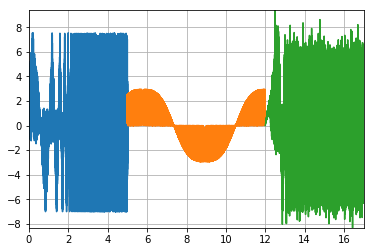

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


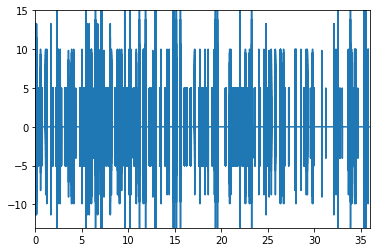

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


In [18]:
sinte = synth(440, np.random.randint(4, 10, np.random.randint(3, 10)))
bata = bateria(10)
melo = random_mel(crom, 10)

banda = [sinte, bata, melo]

largos = [len(i) for i in banda]
max_ind = largos.index(max(largos))
min_ind = largos.index(min(largos))

audio = sum([instr[:min(largos)] for instr in banda])
Audio(audio, rate = 44100, autoplay= True)

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\threading.py", line 914, in _bootstrap_inner
    self.run()
  File "C:\Program Files\Anaconda3\lib\threading.py", line 861, in run
    if self._target:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()



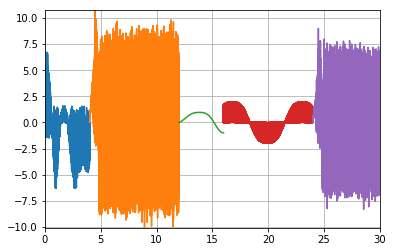

In [19]:
b = threading.Thread(target = bata, args = [10])
p = threading.Thread(target = progression, args = ([Am7, Dm7, E7b9, Bbmaj7], 3))
m = threading.Thread(target = synth, args = (440, np.random.randint(4, 10, np.random.randint(3, 10))))
p.start()
b.start()
m.start()

In [438]:
#head = rb"RIFFDb\x05\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data" + rb"\x05\x00\x00\x00\x04\x08\x01\x10\xee\x17\xc2\x1fw'\x04/b6\x88=rD\x16KnQuW$]ubcg\xeak\x03p\xacs\xe1v\x9ey\xe" + rb"1{\xa7}\xef~\xb7\x7f\xfe\x7f\xc5\x7f\x0c"
#a = play(nota['A'], 4).data[98:] + play(nota['B'], 4).data[98:]     
#from io import BytesIO
#note = wave.open(open(BytesIO(data), 'r'), 'r')

#with open('Obra Electroacustica.wav', 'wb') as t:
#    t.write(audio.data)

#scaled = np.int16(a/np.max(np.abs(a)) * 32767)
#write('test.wav', framerate, data)